# LIFTING LOAD CALCULATION
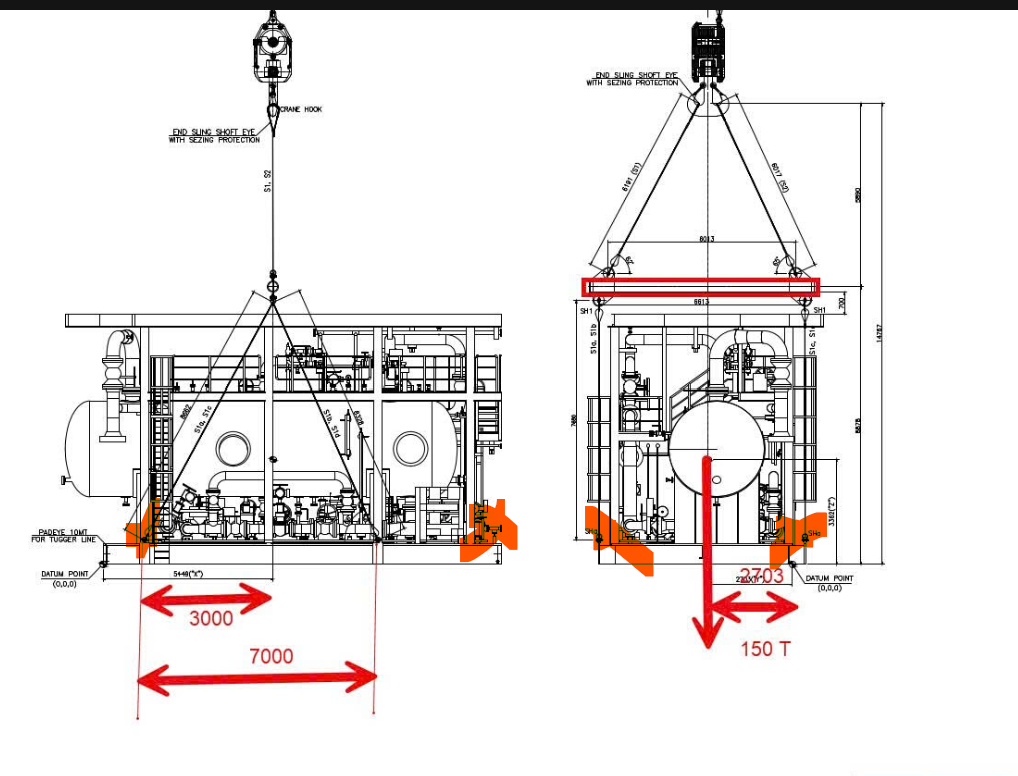

In [1]:
# utilise
import math
def liftLoadCal(w, dt1, odt1, dt2, odt2):
    L = w * (dt1 / odt1) * (dt2 / odt2)
    return L

def tensionCal(load, theta):
    angle = math.radians(theta)
    sineTheta = math.sin(angle)
    tension = load/sineTheta
    return tension

def pipeWeight(od, thickness, uw, lenght):
    weigthPerMeter = od * math.pi * thickness * 7.85
    weigth = weigthPerMeter * lenght
    return weigth

pipe_w = pipeWeight(0.588, 25, 7.85, 6.288)
print(f"SPEADER_BAR pipe's weigth: {round(pipe_w,2)} T")

SPEADER_BAR pipe's weigth: 2279.55 T


## distances between lifting points and load center of gravity
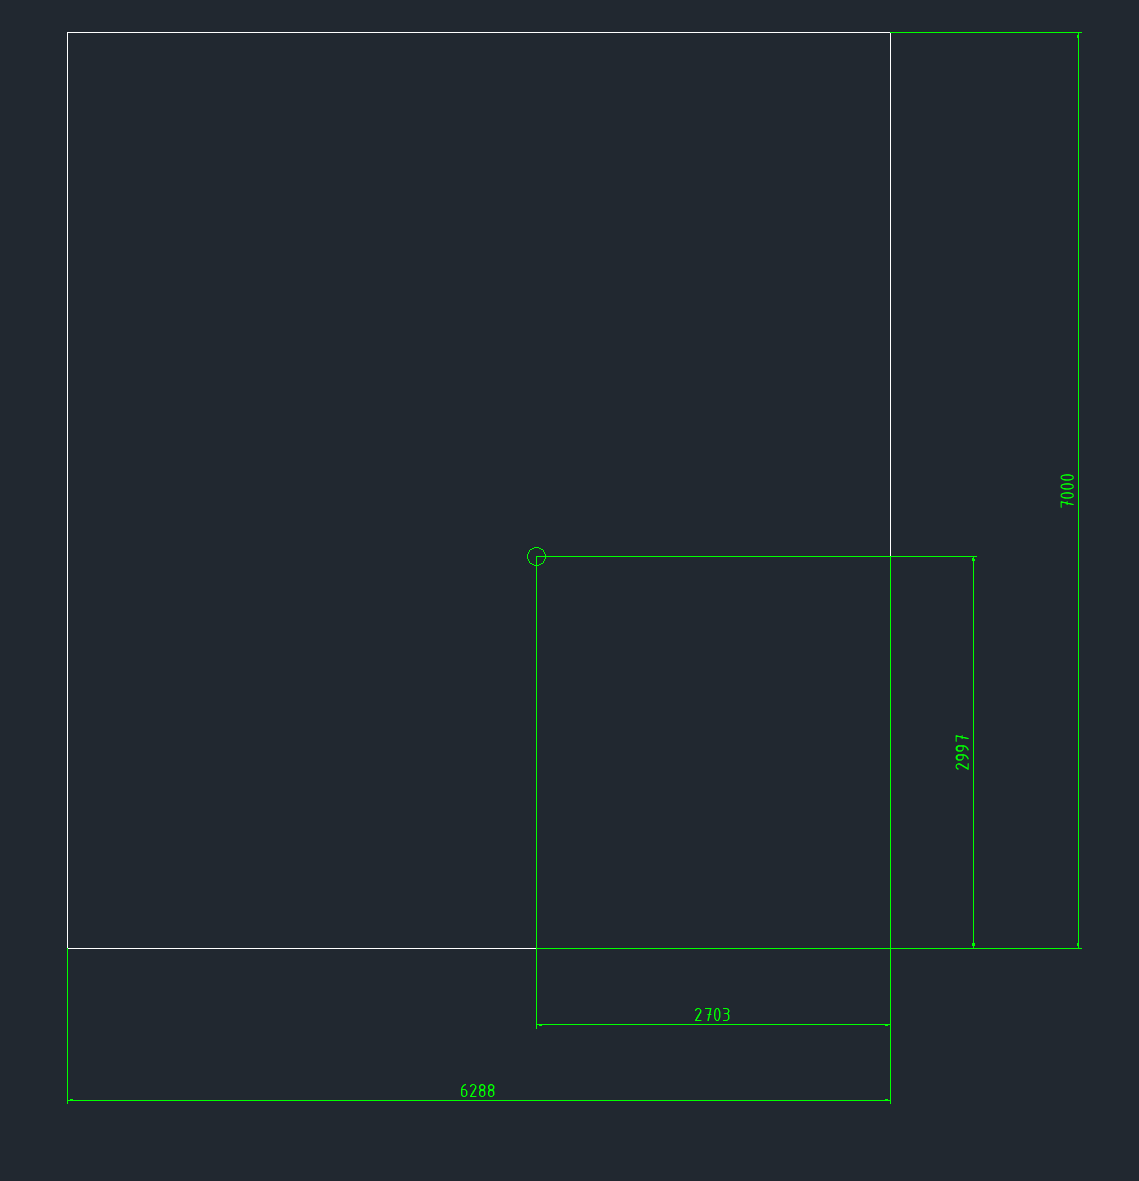

In [2]:
import numpy as np

odt1 = 6288
odt1P1 = 2703
odt1P2 = odt1 - odt1P1

odt2 = 7000
odt2P1 = 3000
odt2P2 = odt2 - odt2P1

LiftingPoint = np.array([[odt1,odt1P2,odt2,odt2P2], #lifting point 1
                [odt1,odt1P1,odt2,odt2P2],
                [odt2,odt2P1,odt1,odt1P1],
                [odt2,odt2P1,odt1,odt1P2],
                ])

In [3]:

cargo_weight = 150

liftingLoadList = []

for i, node in enumerate(LiftingPoint):
    print(i+1, "node: ", node)
    nodeIndex = i + 1
    loadatLiftingPoint = liftLoadCal(cargo_weight, node[1], node[0], node[3], node[2])
    print(f"load at lifting point{nodeIndex}: {round(loadatLiftingPoint,2)}", "\n")
    liftingLoadList.append((i, loadatLiftingPoint))

print(liftingLoadList)


1 node:  [6288 3585 7000 4000]
load at lifting point1: 48.87 

2 node:  [6288 2703 7000 4000]
load at lifting point2: 36.85 

3 node:  [7000 3000 6288 2703]
load at lifting point3: 27.63 

4 node:  [7000 3000 6288 3585]
load at lifting point4: 36.65 

[(0, 48.86859323882224), (1, 36.845692475463466), (2, 27.634269356597596), (3, 36.65144492911668)]


In [4]:
# tension calculation
angles = np.array([70,70,65,65])

for i,angle in enumerate(angles):
    print("node", i+1, "angle", angle)
    loadVal = round(liftingLoadList[i][1],2)
    tension = round(tensionCal(loadVal, angle),2)
    print(f"sling tension: {tension}T")
    print(f"load value: {loadVal}T","\n")


node 1 angle 70
sling tension: 52.01T
load value: 48.87T 

node 2 angle 70
sling tension: 39.21T
load value: 36.85T 

node 3 angle 65
sling tension: 30.49T
load value: 27.63T 

node 4 angle 65
sling tension: 40.44T
load value: 36.65T 



# LOAD AT THE PADEYE OF SPEADER BAR

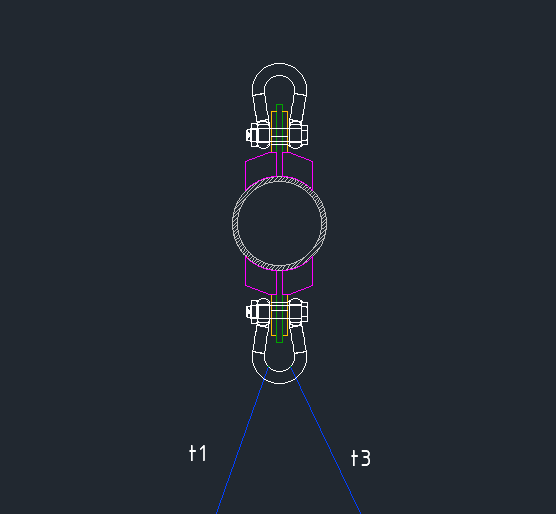
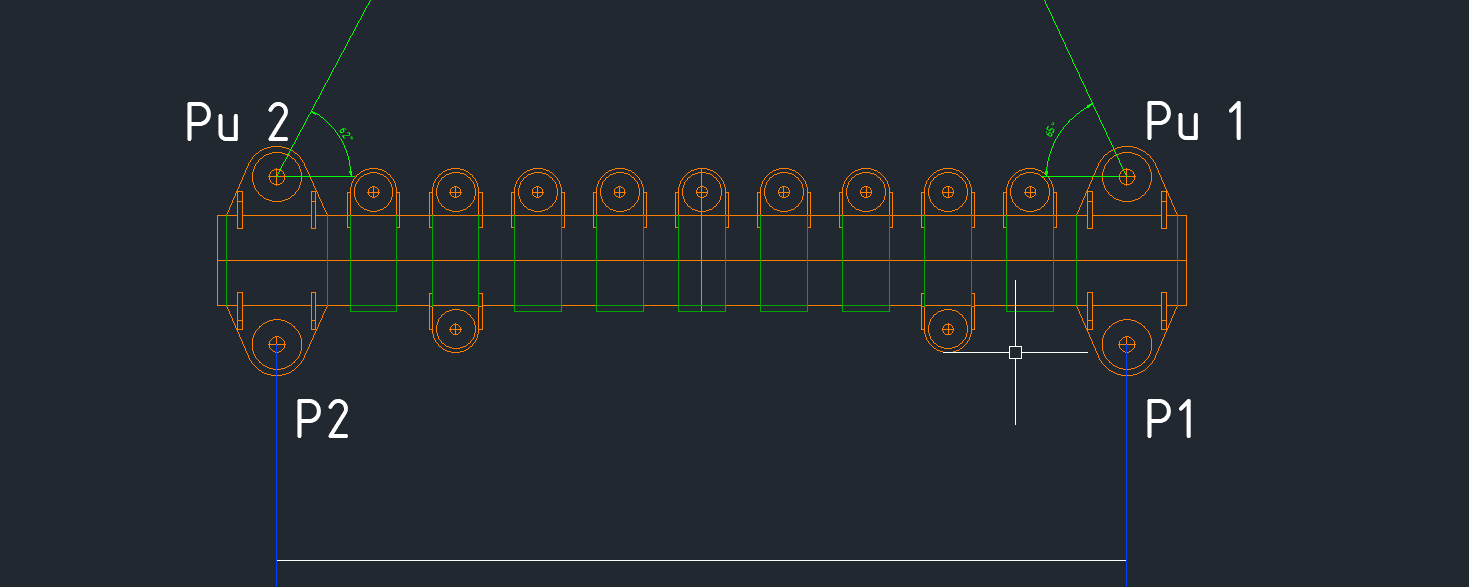

In [22]:
print("load at each lifting point of the structure")
print(pipe_w)
print(liftingLoadList,"\n")

loadP1 = liftingLoadList[0][1] + liftingLoadList[3][1]
loadP2 = liftingLoadList[1][1] + liftingLoadList[2][1]
print(f"load at P1: {round(loadP1,2)} T")
print(f"load at P2: {round(loadP2,2)} T {"\n"}")

loadP1_wspeader = loadP1 + pipe_w 
loadP2_wspeader = loadP2 + pipe_w 
print(f"load at Pu 1: {round(loadP1_wspeader,2)} T")
print(f"load at Pu 2: {round(loadP2_wspeader,2)} T")


load at each lifting point of the structure
2279.5514418331313
[(0, 48.86859323882224), (1, 36.845692475463466), (2, 27.634269356597596), (3, 36.65144492911668)] 

load at P1: 85.52 T
load at P2: 64.48 T 

load at Pu 1: 2365.07 T
load at Pu 2: 2344.03 T


## Calculate for the upper sling
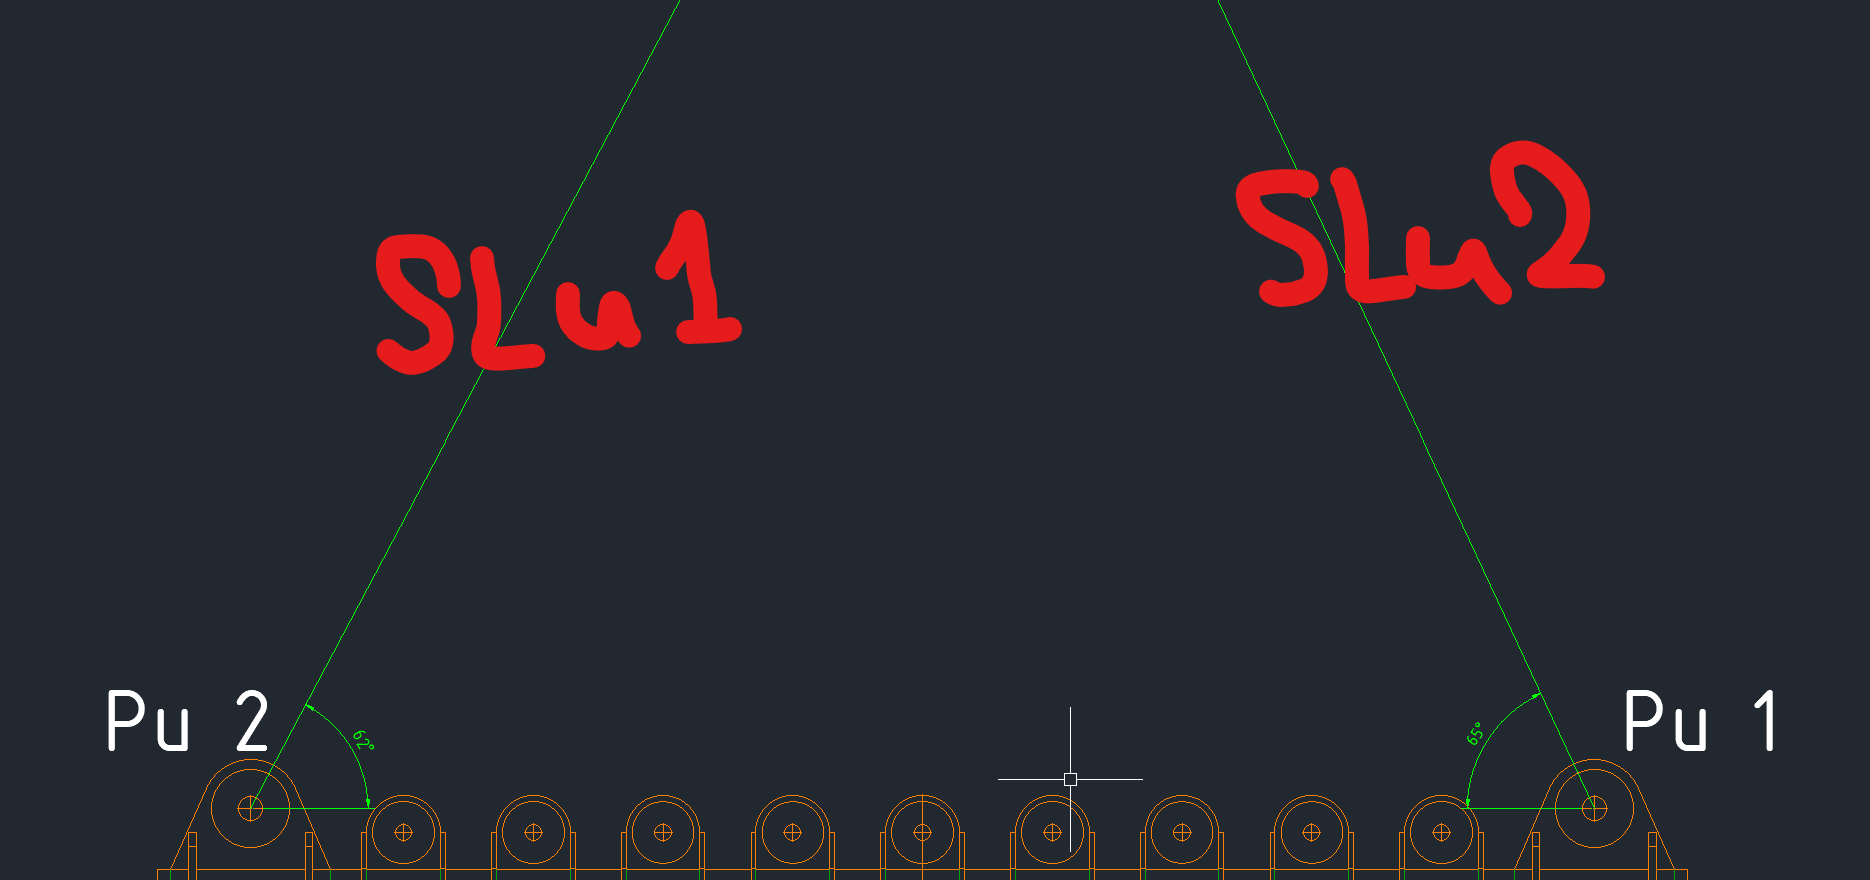

In [27]:
SLu1_tension = tensionCal(loadP1_wspeader, 62)
SLu2_tension = tensionCal(loadP2_wspeader, 65)

print(f"Slu1 tension: {round(SLu1_tension,2)} T")
print(f"Slu2 tension: {round(SLu2_tension,2)} T")

Slu1 tension: 2678.61 T
Slu2 tension: 2586.35 T
